### 👨‍💻 Authors:
- **Giovanni Gunawan Wangidjaja** *(JCDSOL-021)*  
- **Naurotun Nadhifah** *(JCDSOL-021)*

## 1. Business Problem Understanding
### 1.1 *Context*
Kampanye pemasaran bank merupakan salah satu strategi penting bagi institusi keuangan untuk menarik nasabah baru sekaligus mempromosikan produk finansial. Pada projek ini, kami menganalisis data dari **sebuah institusi perbankan di Portugal**, yang menawarkan deposito berjangka (term deposit) selama 3 bulan dengan revenue 1000 USD kepada klien yang kemudian akan dipresentasikan kepada tim marketing Bank agar tahu faktor-faktor apa yang memengaruhi keberhasilan nasabah menerima tawaran tersebut dari dataset, yang berisi informasi mengenai profil nasabah, riwayat kontak kampanye, faktor sosial-ekonomi, serta status apakah nasabah tersebut berlangganan deposito berjangka (`y` = yes/no). 

Dengan memperoleh wawasan ini, pihak bank dapat mengoptimalkan strategi kampanye dengan menekan biaya, yang pada akhirnya berdampak positif pada keterlibatan nasabah dan profitabilitas perusahaan.


### 1.2 *Problem Statement*
Meskipun bank telah melakukan kampanye pemasaran untuk menawarkan produk deposito berjangka, tingkat keberhasilan kampanye masih rendah, terlihat dari nasabah yang tertarik hanya 12.7% saja sedangkan biaya yang diperlukan oleh Bank dalam satu kali penawaran ke satu klien adalah 2.54 USD dengan rerata durasi penawaran 4.3 menit melalui telepon ataupun selular.

Dengan begitu, Bank butuh model prediksi untuk mengidentifikasi klien yang potensial berlangganan deposito, sehingga:
1. Penawaran tidak sia-sia
2. Biaya kampanye berkurang
3. Efisiensi meningkat (perlu prediksi nasabah potensial)


### 1.3 *Goals*
Dengan permasalahan di atas, Bank ingin mengurangi biaya kampanye pemasaran deposito berjangka dengan menargetkan klien yang potensial dengan cara:
1. Mengembangkan model klasifikasi untuk memprediksi apakah seorang klien akan berlangganan deposito (variabel target:`y` = yes/no).
2. Mengidentifikasi variabel penting yang berpengaruh terhadap keputusan nasabah.
3. Memberikan insight ke tim marketing untuk lebih memperbanyak klien potensial agar biaya kampanye turun.


### 1.4 *Analytic Approach*
Langkah analisis yang ditempuh untuk proyek *Bank Marketing Campaign* adalah:

- **Explanatory Data Analysis (EDA):** Mengeksplorasi data untuk memahami distribusi, pola, dan hubungan antar variabel dengan target (`y`).  
- **Feature Engineering:** Membuat variabel baru dan mengolah data kategori/numerik agar lebih informatif.  
- **Preprocessing:** Menangani missing value, encoding kategori, scaling, serta mengatasi class imbalance.  
- **Model Benchmarking:** Membandingkan beberapa algoritma klasifikasi (Logistic Regression, Random Forest, XGBoost, dll.) untuk memilih model terbaik.  
- **Hyperparameter Tuning:** Mengoptimalkan model terpilih agar hasil prediksi lebih akurat.  
- **Evaluasi & Interpretasi:** Menggunakan metrik (AUC, Precision, Recall, F1) serta analisis feature importance untuk menghasilkan insight bisnis. 


### 1.5 *Metric Evaluation*
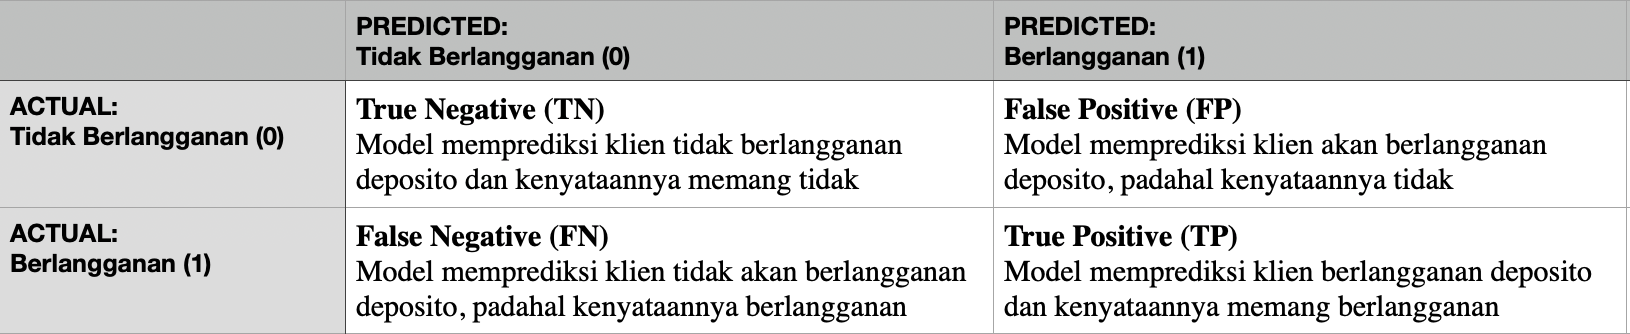

Type I Error (False Positive / FP):
Model salah mengira nasabah akan mengambil deposito, padahal tidak.
Konsekuensi: biaya promosi / marketing sia-sia, waktu dan sumber daya sales terbuang.

Type II Error (False Negative / FN):
Model salah mengira nasabah tidak akan mengambil deposito, padahal sebenarnya mau.
Konsekuensi: kehilangan calon deposan potensial, rugi kesempatan bisnis.

Untuk marketing, biasanya False Negative (FN) lebih berbahaya karena kita kehilangan peluang deposito baru. Tapi False Positive (FP) juga tetap penting karena bisa meningkatkan biaya marketing. Karena itu, metrik yang seimbang antara precision dan recall lebih tepat (F1-Score atau Precision-Recall Curve).

ROC-AUC juga bisa digunakan, tetapi hati-hati bila data sangat imbalanced (proporsi “yes” lebih sedikit dari “no”

## 2. Data Understanding
Dataset source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

Dataset `bank-additional-full.csv` berisi data dari sebuah **kampanye pemasaran bank** di Portugal yang ditujukan untuk mempromosikan produk *term deposit*. Dataset ini memiliki **41.188 baris** dan **21 kolom**, dengan rincian sebagai berikut:


| **Nama Kolom**    | **Tipe Data** | **Deskripsi** |
|-------------------|---------------|---------------|
| `age`             | *Integer*     | Usia nasabah. |
| `job`             | *Object*      | Jenis pekerjaan nasabah (misalnya: *blue-collar*, *technician*, *retired*). |
| `marital`         | *Object*      | Status pernikahan nasabah (misalnya: *divorced*, *married*, *single*). |
| `education`       | *Object*      | Tingkat pendidikan nasabah (misalnya: *university.degree*, *professional.course*, *high.school*, *basic.6y*). |
| `default`         | *Object*      | Status apakah nasabah memiliki kredit macet (*default*) sebelumnya (*yes* / *no* / *unknown*). |
| `housing`         | *Object*      | Status kepemilikan pinjaman rumah (*yes* / *no* / *unknown*). |
| `loan`            | *Object*      | Status kepemilikan pinjaman pribadi (*yes* / *no* / *unknown*). |
| `contact`         | *Object*      | Jenis saluran komunikasi yang digunakan untuk menghubungi nasabah (*telephone* / *cellular*). |
| `month`           | *Object*      | Bulan terakhir nasabah dihubungi (misalnya: *mar*, *may*, *nov*). |
| `day_of_week`     | *Object*      | Hari terakhir dalam minggu saat nasabah dihubungi (misalnya: *mon*, *wed*, *fri*). |
| `duration`        | *Integer*     | Durasi panggilan terakhir dalam detik. |
| `campaign`        | *Integer*     | Jumlah kontak yang dilakukan selama kampanye ini (terhadap nasabah tertentu). |
| `pdays`           | *Integer*     | Jumlah hari sejak nasabah terakhir kali dihubungi dari kampanye sebelumnya. Nilai 999 berarti nasabah belum pernah dihubungi sebelumnya. |
| `previous`        | *Integer*     | Jumlah kontak yang dilakukan dalam kampanye sebelumnya. |
| `poutcome`        | *Object*      | Hasil dari kampanye pemasaran sebelumnya (*failure*, *success*, *nonexistent*). |
| `emp.var.rate`    | *Float*       | Tingkat variasi lapangan kerja (*employment variation rate*) – indikator kondisi ekonomi. |
| `cons.price.idx`  | *Float*       | Indeks harga konsumen (*consumer price index*) – data bulanan. |
| `cons.conf.idx`   | *Float*       | Indeks kepercayaan konsumen (*consumer confidence index*) – data bulanan. |
| `euribor3m`       | *Float*       | Suku bunga *euribor 3 bulan*. |
| `nr.employed`     | *Float*       | Jumlah tenaga kerja (estimasi kuartalan). |
| `y`               | *Object*      | Hasil target: apakah nasabah berlangganan deposito berjangka (*yes* / *no*). |

In [3]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
#Summary for each coloumn
summary = pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [
        (df[col] < 0).mean() * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 
        for col in df.columns
    ],
    '0_value(%)': [
        (df[col] == 0).mean() * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 
        for col in df.columns
    ],
    'duplicate': [df.duplicated().sum()] * len(df.columns),  # repeat value for all rows
    'n_unique': df.nunique().values,
    'sample_unique': [", ".join(map(str, df[col].unique())) for col in df.columns]
}).round(3)

summary

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,age,int64,0.0,0.000,0.000,12,78,"56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54..."
1,job,object,0.0,0.000,0.000,12,12,"housemaid, services, admin., blue-collar, tech..."
2,marital,object,0.0,0.000,0.000,12,4,"married, single, divorced, unknown"
3,education,object,0.0,0.000,0.000,12,8,"basic.4y, high.school, basic.6y, basic.9y, pro..."
4,default,object,0.0,0.000,0.000,12,3,"no, unknown, yes"
5,housing,object,0.0,0.000,0.000,12,3,"no, yes, unknown"
6,loan,object,0.0,0.000,0.000,12,3,"no, yes, unknown"
7,contact,object,0.0,0.000,0.000,12,2,"telephone, cellular"
8,month,object,0.0,0.000,0.000,12,10,"may, jun, jul, aug, oct, nov, dec, mar, apr, sep"
9,day_of_week,object,0.0,0.000,0.000,12,5,"mon, tue, wed, thu, fri"


***Explanatory Data Analysis***

Feature selection

Kolom yang akan digunakan adalah:

1. age
2. job
3. marital
4. education
5. default
6. housing
7. loan
8. campaign
9. pdays
10. duration
11. emp.var.rate
12. nr.employed
13. y

karena terdapat missing value berupa "unknown" dan terdapat data duplicate pada kolom-kolom tersebut, maka perlu dicleaning

In [6]:
#Hapus duplicate data
df = df.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", len(df))

Jumlah data setelah hapus duplikat: 41176


In [7]:
#Hapus data "unknown" dan buat dataframe baru
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'duration', 'emp.var.rate', 'nr.employed', 'y']]
df = df[~df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'duration', 'emp.var.rate', 'nr.employed','y']].isin(['unknown']).any(axis=1)]
df

,age,job,marital,education,default,housing,loan,campaign,pdays,duration,emp.var.rate,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,261,1.1,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,226,1.1,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,151,1.1,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,307,1.1,5191.0,no
6,59,admin.,married,professional.course,no,no,no,1,999,139,1.1,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,999,334,-1.1,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,1,999,383,-1.1,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,2,999,189,-1.1,4963.6,no
41186,44,technician,married,professional.course,no,no,no,1,999,442,-1.1,4963.6,yes


In [8]:
#nilai value
for col in ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'emp.var.rate', 'nr.employed', 'y']:
   print(f"\n{col} value counts:")
   print(df[col].value_counts())


age value counts:
age
31    1643
32    1554
33    1524
30    1441
34    1431
      ... 
91       2
89       2
95       1
87       1
94       1
Name: count, Length: 76, dtype: int64

job value counts:
job
admin.           8734
blue-collar      5674
technician       5469
services         2856
management       2311
retired          1215
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: count, dtype: int64

marital value counts:
marital
married     17487
single       9439
divorced     3552
Name: count, dtype: int64

education value counts:
education
university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: count, dtype: int64

default value counts:
default
no     30475
yes        3
Name: count, dtype: int64

housing value counts:
housing
yes    16516
no     13962
Name: count,

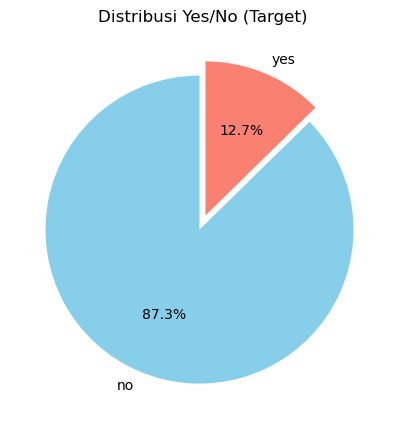

In [9]:
##Pie chart yes/no secara general
plt.figure(figsize=(5,5))
df['y'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon'],
    explode=[0.05, 0.05]
)
plt.title("Distribusi Yes/No (Target)")
plt.ylabel('')
plt.show()

Dari 30488 data yang sudah dibersihkan, nasabah yang tertarik untuk deposito berjangka hanya sebesar 12.7%.
Perlu data lebih rinci mengenai background nasabah yang tertarik, seperti umur, pekerjaan, status perkawinan, dan pendidikan terakhir, serta riwayat kredit macet, pinjaman rumah, dan pinjaman pribadi.

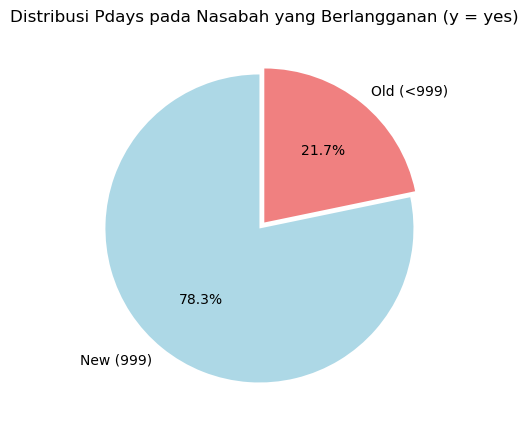

In [10]:
##Pie chart pdays (old vs new=999)
df_pdays = df[df['y'] == 'yes']
df_pdays['pdays'] = df_pdays['pdays'].apply(lambda x: 'New (999)' if x == 999 else 'Old (<999)')
plt.figure(figsize=(5,5))
df_pdays['pdays'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue','lightcoral'],
    explode=[0.05, 0]
)
plt.title("Distribusi Pdays pada Nasabah yang Berlangganan (y = yes)")
plt.ylabel('')
plt.show()

Sebanyak 21.7% nasabah merupakan nasabah yang pernah ditawari produk deposito berjangka sebelumnya dan sebanyak 78.3% merupakan nasabah baru yang berhasil di penawaran deposito berjangka pertama kali.

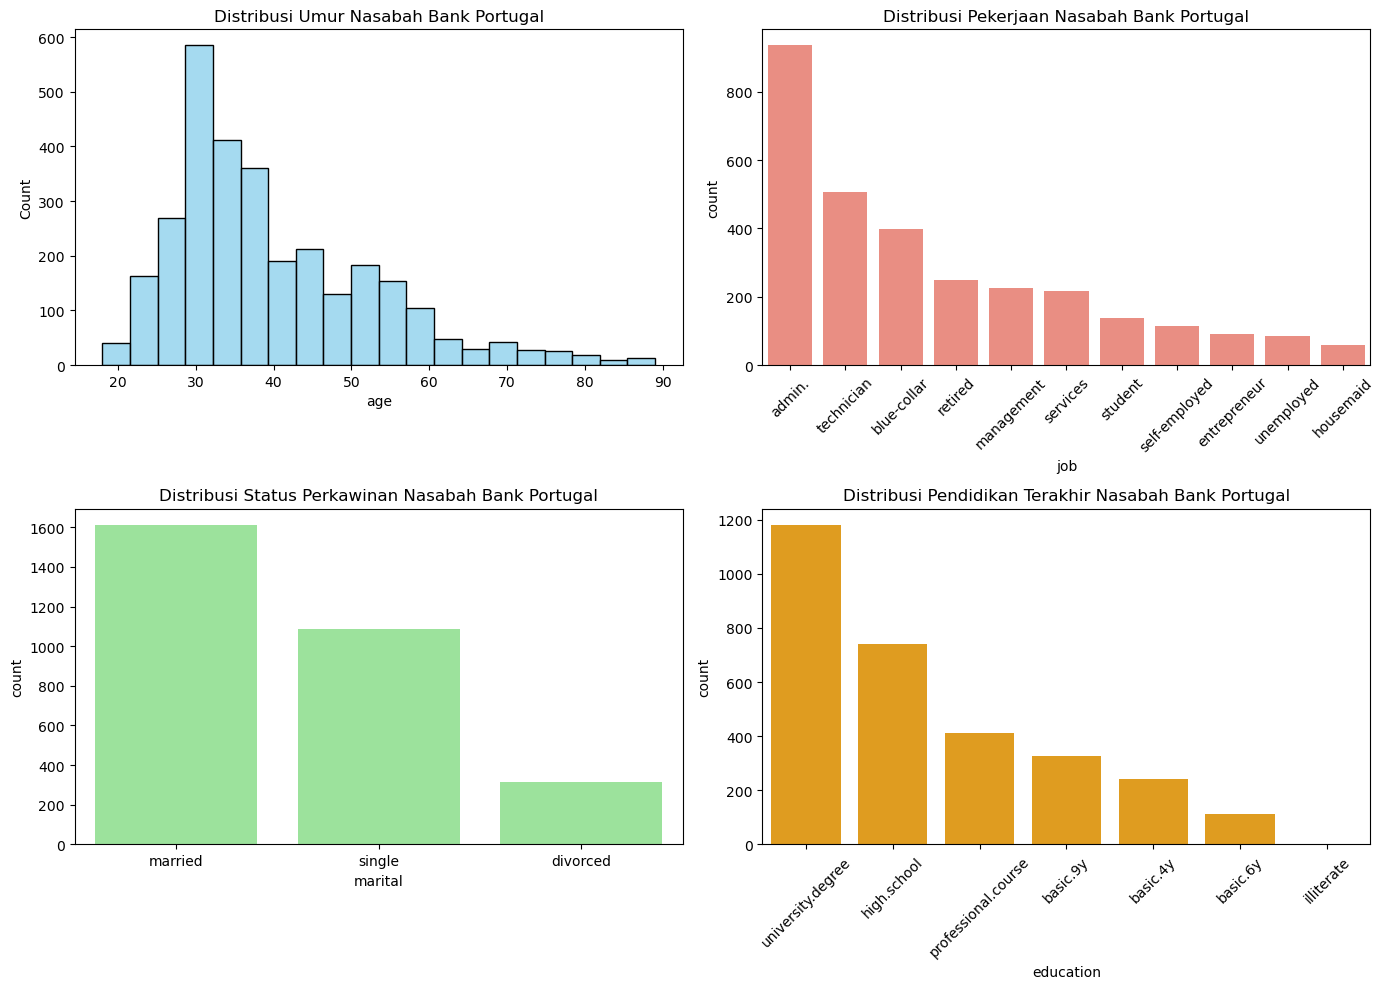

In [11]:
#Bar plot distribusi umur, pekerjaan, status perkawinan, dan pendidikan terakhir
df_yes = df[(df['y'] == 'yes') & (df['pdays'] == 999)]

fig, axes = plt.subplots(2, 2, figsize=(14,10))
sns.histplot(df_yes['age'], bins=20, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribusi Umur Nasabah Bank Portugal")

sns.countplot(data=df_yes, x='job', ax=axes[0,1], order=df_yes['job'].value_counts().index, color="salmon")
axes[0,1].set_title("Distribusi Pekerjaan Nasabah Bank Portugal")
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_yes, x='marital', ax=axes[1,0], order=df_yes['marital'].value_counts().index, color="lightgreen")
axes[1,0].set_title("Distribusi Status Perkawinan Nasabah Bank Portugal")

sns.countplot(data=df_yes, x='education', ax=axes[1,1], order=df_yes['education'].value_counts().index, color="orange")
axes[1,1].set_title("Distribusi Pendidikan Terakhir Nasabah Bank Portugal")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Dari grafik di atas, profil nasabah yang paling potensial untuk tertarik/berhasil menaruh deposito berjangka di Bank adalah
1. Nasabah yang berusia kisaran 28 sampai dengan 40 tahun
2. Bekerja sebagai admin
3. Dengan status perkawinan sudah menikah
4. Dan memiliki pendidikan terakhir tingkat universitas

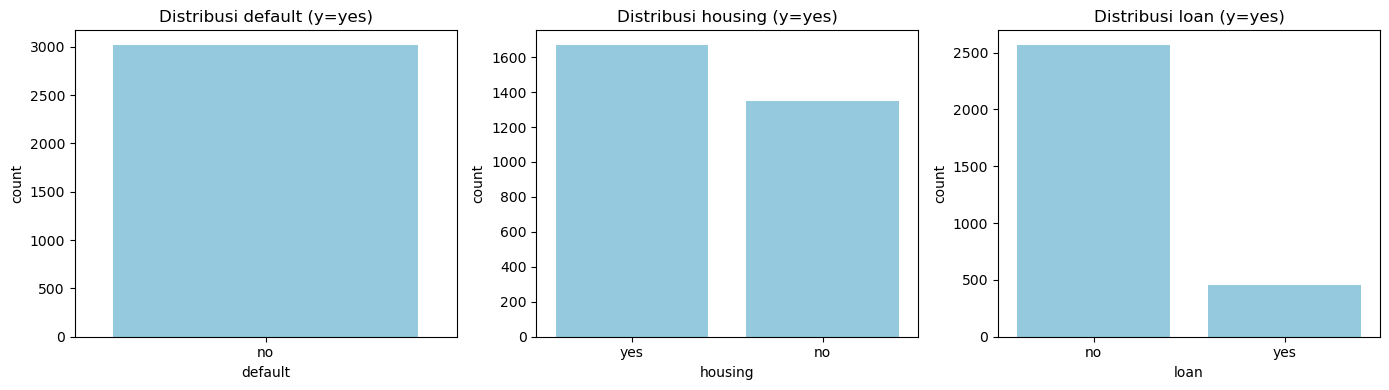

In [12]:
##Bar chart default, housing, loan dengan y = yes
fig, axes = plt.subplots(1, 3, figsize=(14,4))
for i, col in enumerate(['default','housing','loan']):
    sns.countplot(data=df_yes, x=col, ax=axes[i], color="skyblue", order=df_yes[col].value_counts().index)
    axes[i].set_title(f"Distribusi {col} (y=yes)")
plt.tight_layout()
plt.show()

Distribusi riwayat utang/pinjaman nasabah yang paling potensial untuk tertarik/berhasil menaruh deposito berjangka di Bank adalah
1. Tidak ada riwayat kredit macet
2. Memiliki riwayat pinjaman rumah
3. Tidak memiliki riwayat pinjaman pribadi

poin 2 perlu dites korelasi dengan usia nasabah 28 sampai dengan 40 tahun dan dengan status perkawinan sudah menikah
begitu juga dengan poin 1 dan 3 yang akan dites korelasi dengan usia dan pendidikan terakhir

In [13]:
#Tes korelasi usia dan pinjaman rumah
df['housing_bin'] = df['housing'].map({'yes':1, 'no':0})
corr_pb = stats.pointbiserialr(df['housing_bin'], df['age'])
print("Point-Biserial Correlation age vs housing:", corr_pb)

#Tes korelasi status perkawinan dan pinjaman rumah
cont_table = pd.crosstab(df['marital'], df['housing'])
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
print("Chi-square marital vs housing:")
print("Chi2 =", chi2, "p-value =", p)

Point-Biserial Correlation age vs housing: SignificanceResult(statistic=0.004796435186757754, pvalue=0.40240726696442813)
Chi-square marital vs housing:
Chi2 = 2.9684502425091974 p-value = 0.2266779205438109


In [14]:
df['default_bin'] = df['default'].map({'yes':1, 'no':0})
df['loan_bin'] = df['loan'].map({'yes':1, 'no':0})

#Tes korelasi usia dan kredit macet
corr_age_default = stats.pointbiserialr(df['default_bin'], df['age'])
print("Point-Biserial Age vs Default:", corr_age_default)

#Tes korelasi usia dan pinjaman pribadi
corr_age_loan = stats.pointbiserialr(df['loan_bin'], df['age'])
print("Point-Biserial Age vs Loan:", corr_age_loan)

#Tes korelasi tingkat pendidikan akhir dan kredit macet
table_ed_default = pd.crosstab(df['education'], df['default'])
chi2, p, dof, ex = stats.chi2_contingency(table_ed_default)
print("Chi-Square Education vs Default: Chi2 =", chi2, "p =", p)

#Tes korelasi tingkat pendidikan akhir dan pinjaman pribadi
table_ed_loan = pd.crosstab(df['education'], df['loan'])
chi2, p, dof, ex = stats.chi2_contingency(table_ed_loan)
print("Chi-Square Education vs Loan: Chi2 =", chi2, "p =", p)

Point-Biserial Age vs Default: SignificanceResult(statistic=0.003172289746572651, pvalue=0.5797188628666289)
Point-Biserial Age vs Loan: SignificanceResult(statistic=-0.01092284804259791, pvalue=0.05653561542485605)
Chi-Square Education vs Default: Chi2 = 7.73181638084492 p = 0.25841687542964736
Chi-Square Education vs Loan: Chi2 = 5.53638797477727 p = 0.4770696797062456


Dari tes korelasi di atas memiliki makna:
1. Usia dan pinjaman rumah tidak ada hubungan signifikan
2. Status perkawinan dan pinjaman rumah tidak ada hubungan signifikan
3. Usia dan kredit macet tidak ada hubungan signifikan
4. Usia dan pinjaman pribadi ada hubungan hampir signifikan
5. Tingkat pendidikan dan kredit macet tidak ada hubungan signifikan
6. Tingkat pendidikan dan pinjaman pribadi tidak ada hubungan sertifikat

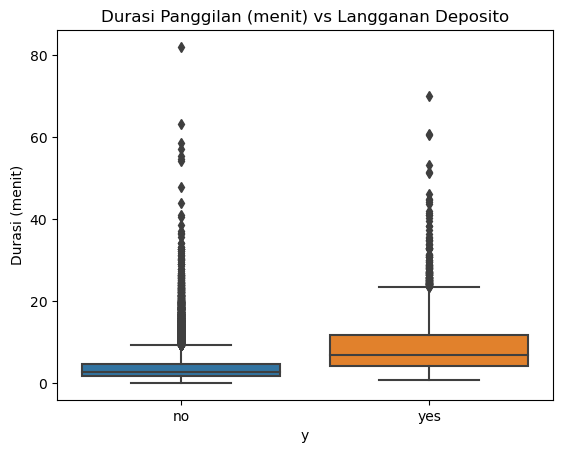

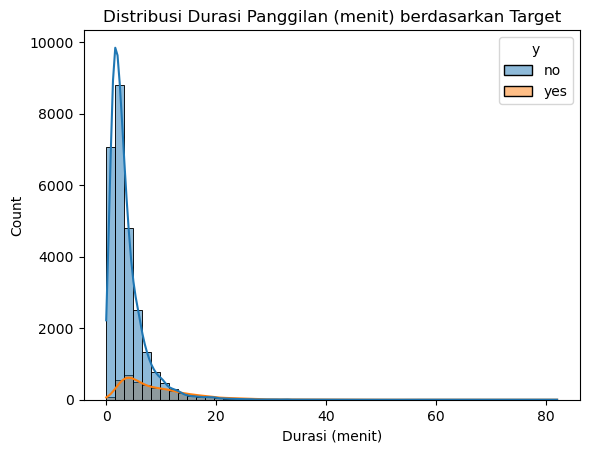

In [15]:
#Boxplot dan Histogram duration keseluruhan penawaran
#ubah terlebih dahulu satuan detik ke menit
df['duration'] = df['duration'] / 60

sns.boxplot(x='y', y='duration', data=df)
plt.title("Durasi Panggilan (menit) vs Langganan Deposito")
plt.ylabel("Durasi (menit)")
plt.show()

sns.histplot(data=df, x='duration', hue='y', bins=50, kde=True)
plt.title("Distribusi Durasi Panggilan (menit) berdasarkan Target")
plt.xlabel("Durasi (menit)")
plt.show()

In [ ]:
#Perlu membandingkan durasi waktu dalam menit untuk mengetahui berapa biaya yang terpakai jika klien menerima dan menolak tawaran deposito berjangka

mean_duration = df['duration'].mean()
print("Rata-rata durasi (menit) keseluruhan:", mean_duration)

mean_duration_yes = df.loc[df['y'] == 'yes', 'duration'].mean()
print("Rata-rata durasi (menit) untuk y=yes:", mean_duration_yes)

mean_duration_no = df.loc[df['y'] == 'no', 'duration'].mean()
print("Rata-rata durasi (menit) untuk y=no:", mean_duration_no)

Dari durasi panggilan dan rerata panggilan, memiliki makna:
1. Median dan rerata lebih tinggi untuk y=yes. Terlihat dari kotak oranye (yes) punya garis median (garis horizontal di dalam box) yang lebih tinggi dibanding kotak biru (no). Artinya, rata-rata/median durasi panggilan lebih lama untuk nasabah yang akhirnya berlangganan deposito (yes).
2. Sebaran data lebih besar untuk y=yes. Terlihat dari tinggi kotak (interquartile range) di sisi yes lebih lebar sehingga variasi lama panggilan di kelompok yes lebih besar. Ini menunjukkan bahwa beberapa nasabah butuh panggilan yang jauh lebih lama sebelum memutuskan ikut deposito.
3. Outlier (titik di atas whisker)
Banyak titik di atas batas normal, baik di no maupun yes, menandakan ada panggilan yang sangat lama (outlier), tapi outlier yes cenderung lebih panjang dibanding no.
4. Whisker (garis di luar kotak) Batas atas pada yes jauh lebih tinggi daripada no menunjukkan bahwa panggilan panjang lebih sering terjadi pada nasabah yang akhirnya setuju deposito.

Dengan begitu
1. Durasi panggilan berhubungan dengan konversi: semakin lama Bank menelepon dan mempertahankan percakapan, semakin besar peluang klien akhirnya setuju untuk membuka deposito.
2. Strategi telemarketing: melatih tim untuk menjaga engagement lebih lama/lebih menarik bisa meningkatkan rasio yes. Tapi di sisi lain perlu hati-hati juga, karena panggilan yang terlalu panjang ke klien yang akhirnya no adalah pemborosan biaya dan waktu.

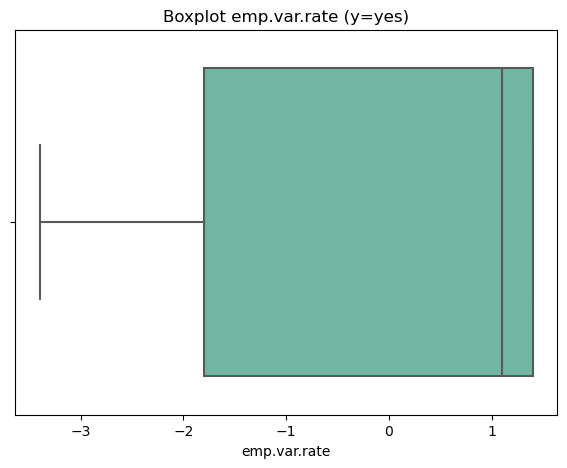

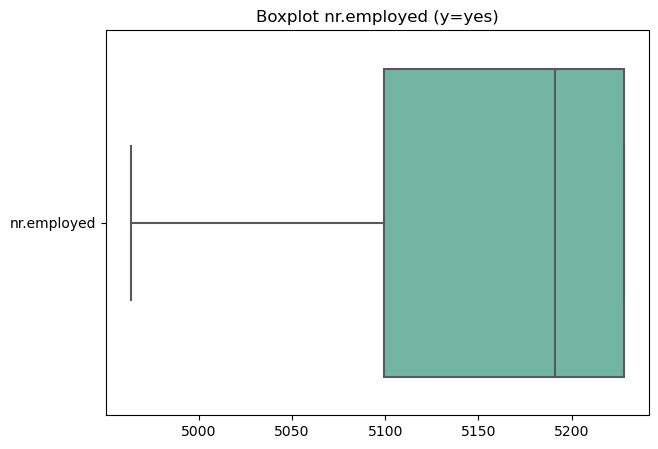

In [16]:
##Box distribution emp.var.rate vs nr.employed (y=yes)
plt.figure(figsize=(7,5))
sns.boxplot(x=df['emp.var.rate'], orient="h", palette="Set2")
plt.title("Boxplot emp.var.rate (y=yes)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df[['nr.employed']], orient="h", palette="Set2")
plt.title("Boxplot nr.employed (y=yes)")
plt.show()

**Makna boxplot emp.var.rate:**
Garis tengah (median) ada di sekitar 1 artinya sebagian besar nasabah yang setuju deposito dihubungi ketika kondisi ekonomi cukup positif.
Whisker ke kiri sampai sekitar -3 artinya ada periode ekonomi buruk (negatif) di mana masih ada beberapa nasabah yang mau deposito, tapi jarang.
Tidak banyak outlier.

**Makna boxplot nr.employed:**
Garis vertikal (median) di dalam kotak ada di sekitar 5190–5200. Artinya, sebagian besar nasabah yang berlangganan deposito dihubungi ketika indikator tenaga kerja berada di kisaran tinggi (ekonomi stabil).
Interquartile range (IQR) mencakup sekitar 5100 – 5230. Ini berarti 50% data nr.employed untuk y=yes berada dalam rentang itu.
Whisker (garis horizontal keluar dari kotak) batas bawahnya turun sampai sekitar 4990–5000. Jadi ada sebagian kecil kondisi dengan jumlah tenaga kerja lebih rendah, tapi masih menghasilkan nasabah yang setuju deposito.
Tidak banyak outlier.

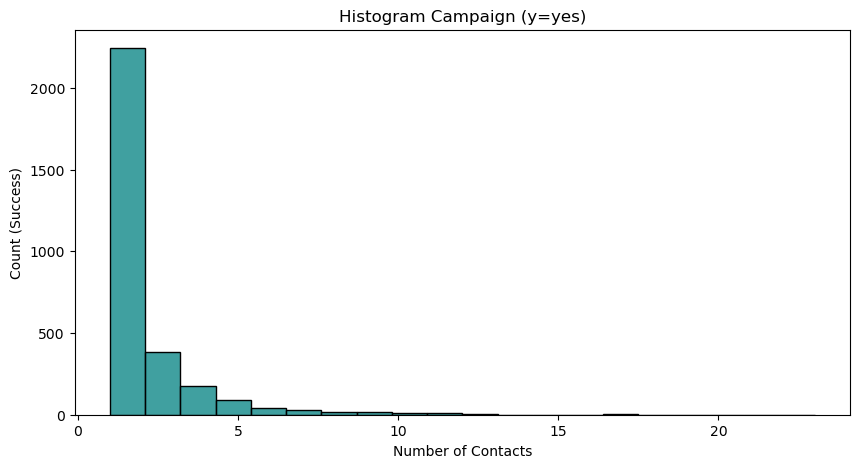

In [17]:
##Histogram campaign vs success rate
plt.figure(figsize=(10,5))
sns.histplot(df_yes['campaign'], bins=20, kde=False, color="teal")
plt.title("Histogram Campaign (y=yes)")
plt.xlabel("Number of Contacts")
plt.ylabel("Count (Success)")
plt.show()

Semakin sering penawaran saat campaign malah semakin sedikit klien yang tertarik dengan deposito berjangka. Maksimal penawaran 6 kali karena mempertimbangkan biaya yang dikeluarkan untuk melakukan panggilan saat penawaran.

***Modeling & Evaluation***

In [21]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# xgb = XGBClassifier()
# lgbm = lgb.LGBMClassifier()

In [22]:
models = [logreg, knn, dt, rf]
rata = []
std = []

x = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

numeric_features = x.select_dtypes(include=['int64','float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

models = [logreg, knn, dt, rf]
rata = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
    rata.append(model_cv.mean())
    std.append(model_cv.std())

result = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'mean roc_auc': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean roc_auc', ascending=False)

print(result)

                     mean roc_auc      sdev
model                                      
Logistic Regression      0.917929  0.003456
Random Forest            0.916384  0.003183
KNN                      0.844302  0.004632
Decision Tree            0.712209  0.003779


In [23]:
models = [logreg,knn,dt,rf]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      5324
         yes       0.61      0.39      0.48       772

    accuracy                           0.89      6096
   macro avg       0.76      0.68      0.71      6096
weighted avg       0.88      0.89      0.88      6096

KNN 
               precision    recall  f1-score   support

          no       0.92      0.95      0.93      5324
         yes       0.52      0.40      0.45       772

    accuracy                           0.88      6096
   macro avg       0.72      0.67      0.69      6096
weighted avg       0.87      0.88      0.87      6096

Decision Tree 
               precision    recall  f1-score   support

          no       0.92      0.92      0.92      5324
         yes       0.46      0.47      0.46       772

    accuracy                           0.86      6096
   macro avg       0.69      0.69      0.69      6096
weighted avg       0.86      0

,roc_auc score
model,
Random Forest,0.909089
Logistic Regression,0.907535
KNN,0.831506
Decision Tree,0.694364


In [ ]:
1. Logistic Regression
Recall "yes" = 0.39 → model hanya menemukan 39% nasabah yang benar-benar yes.
Precision "yes" = 0.61 → dari semua prediksi yes, hanya 61% benar.
Accuracy = 0.89 (tinggi, tapi misleading karena kelas "no" dominan).
ROC AUC = 0.907 → bagus, model punya kemampuan ranking yang tinggi, hanya threshold default (0.5) yang bikin recall rendah.
Kuat di ROC AUC, tapi lemah recall yes.
    
2. KNN
Recall "yes" = 0.40 → mirip Logistic Regression.
Precision "yes" = 0.52 → lebih banyak false positive.
ROC AUC = 0.83 → lebih jelek dibanding Logistic & RF.
Kurang cocok, tidak stabil di imbalance data.
    
3. Decision Tree
Recall "yes" = 0.47 → lebih baik dari Logistic/KNN.
Precision "yes" = 0.46 → imbang, tapi rendah.
Accuracy = 0.86 (lebih rendah).
ROC AUC = 0.69 (paling jelek).
Agak balance precision–recall, tapi performa global buruk.

4. Random Forest
Recall "yes" = 0.46 → terbaik dari semua model.
Precision "yes" = 0.59 → masih lumayan.
F1-score "yes" = 0.52 → juga terbaik.
ROC AUC = 0.91 → paling tinggi, hampir sama Logistic.
Paling bagus sejauh ini: recall yes lumayan, ROC AUC tinggi

#### **Conlusion dan Recommendation**
Berdasarkan analisis dan pemodelan yang telah dilakukan terhadap dataset Bank Marketing Campaign, diperoleh beberapa kesimpulan penting:
1. Distribusi target tidak seimbang, di mana hanya sekitar 12.7% nasabah yang berlangganan deposito berjangka. Hal ini menunjukkan perlunya strategi yang fokus pada identifikasi klien potensial.
2. Nasabah dengan status pekerjaan sebagai admin, berusia 30-40 tahun, berstatus perkawinan sudah menikah, tingkat pendidikan universitas, tidak memiliki riwayat kredit macet dan riwayat peminjaman pribadi, serta memiliki riwayat pinjaman rumah merupakan klien paling potensial subscribe deposito berjangka.
3. Faktor durasi kontak (duration) memiliki pengaruh paling kuat terhadap keputusan nasabah, diikuti oleh variabel kampanye seperti pdays, previous, dan kondisi ekonomi seperti euribor3m dan emp.var.rate.
4. Hasil evaluasi model menunjukkan bahwa model decision tree dan random forest karena decision tree memiliki recallyes yg bagus serta rendom forest karena rerata roc_auc lebih bagus memberikan performa terbaik dibandingkan dengan model lainnya, sehingga lebih andal untuk memprediksi klien potensial.

Secara keseluruhan, model yang dibangun dapat membantu tim pemasaran dalam mengurangi biaya kampanye dan meningkatkan efisiensi, karena bank dapat memprioritaskan calon nasabah dengan probabilitas tinggi untuk berlangganan.

Berdasarkan hasil analisis dan model yang dikembangkan, rekomendasi strategis yang dapat diterapkan adalah:
1. Fokuskan kampanye pada segmen nasabah dengan profil pekerjaan tertentu (mis. retired, management, student) yang memiliki tingkat konversi tinggi.
2. Optimalkan durasi dan frekuensi kontak hindari terlalu banyak percobaan kontak yang tidak efektif; gunakan hasil prediksi model untuk menentukan siapa yang layak dihubungi lebih dulu.
3. Integrasikan model prediksi ke sistem CRM bank, agar tim marketing dapat langsung melihat skor probabilitas setiap nasabah sebelum melakukan kampanye.
4. Lakukan pembaruan model secara berkala dengan data terbaru, mengingat kondisi ekonomi seperti suku bunga (euribor3m) dan tingkat pekerjaan (emp.var.rate) dapat berubah dari waktu ke waktu.